#Linear Regression Recap

here linear regression is wrong. we are only doing this to understand the difference. as age bought , answer should be bought/ nont bought, 0 or 1. even linear line is not coming.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Import the Dataset: Product Sales Data/Product_sales.csv
sales=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Product%20Sales%20Data/Product_sales.csv")

In [5]:
import sklearn as sk
from sklearn import linear_model

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sales[["Age"]], sales[["Bought"]])


LinearRegression()

In [4]:
print("intercept",lr.intercept_)
print("Co-efficient",lr.coef_)

intercept [-0.17041247]
Co-efficient [[0.02094213]]


In [6]:
d1=pd.DataFrame({"Age":[4]})
predict1=lr.predict(d1)
print(predict1)

[[-0.08664394]]


In [7]:
#If Age is 105 then will that customer buy the product?
d2=pd.DataFrame({"Age":[105]})
predict2=lr.predict(d2)
print(predict2)

[[2.02851132]]


## Drawing Linear Regression line

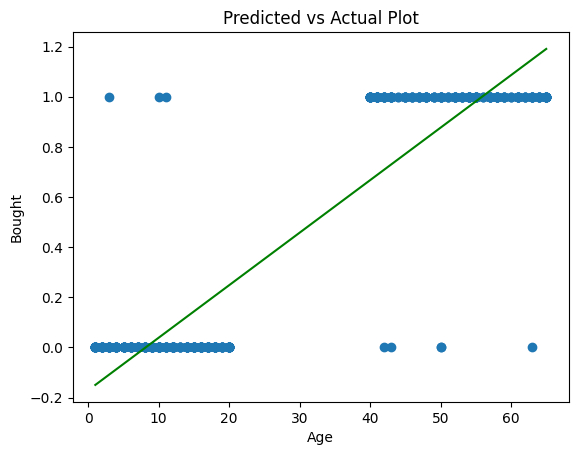

In [7]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column 
new_data["pred_values"]= lr.predict(new_data)
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title 
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(sales[["Age"]],sales["Bought"])

LogisticRegression()

#intercept b0
#coefficient= b1

In [12]:
print("Intercept", logistic.intercept_)
print("Coefficient", logistic.coef_)

Intercept [-6.90672827]
Coefficient [[0.21776006]]


In [13]:
#A 4 years old customer, will he buy the product?

predict_age1=logistic.predict(d1)
print(predict_age1)

[0]


In [14]:
#If Age is 105 then will that customer buy the product?

predict_age2=logistic.predict(d2)
print(predict_age2)

[1]


## Drawing Logistic Regression line

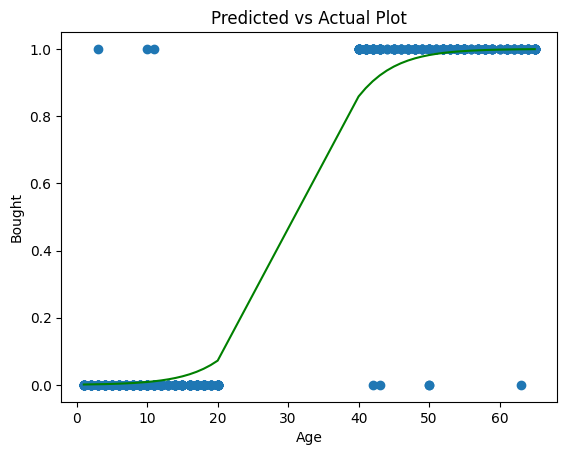

In [12]:
new_data=sales.drop(["Bought"], axis=1)
#Pass the variables to get the predicted values. Add actual values in a new column 
new_data["pred_values"]= logistic.predict_proba(new_data)[:,1]
new_data["Actual"]=sales["Bought"]

#Sort the data and draw the graph
new_data=new_data.sort_values(["pred_values"])
plt.scatter(new_data["Age"], new_data["Actual"])
plt.plot(new_data["Age"], new_data["pred_values"], color='green')
#Add lables and title 
plt.title('Predicted vs Actual Plot')
plt.xlabel('Age')
plt.ylabel('Bought')
plt.show()

# Multiple Logistic Regression

In [15]:
Fiber=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Fiberbits/Fiberbits_v1.csv")

In [ ]:
Fiber.info()

In [ ]:
logistic1= LogisticRegression()
###fitting logistic regression for active customer on rest of the variables#######
logistic1.fit(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']],Fiber[['active_cust']])


In [18]:
print("Intercept", logistic1.intercept_)
print("Coefficients", logistic1.coef_)

Intercept [-0.01111427]
Coefficients [[ 3.67521859e-05  2.55359807e-02  7.37652747e-01 -2.63589093e-01
  -1.43424976e-01  1.32372963e-04 -2.64462983e-01 -7.62392338e-02]]


# Confusion Matrix & Accuracy

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [21]:
predict1=logistic1.predict(Fiber[["income"]+['months_on_network']+['Num_complaints']+['number_plan_changes']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
predict1

cm1 = confusion_matrix(Fiber[['active_cust']],predict1)
print(cm1)

[[33855  8286]
 [ 6141 51718]]


In [22]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)


col sums [39996 60004]
Total 100000


In [23]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

0.85573

# Multicollinearity

In [24]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [25]:
vif_cal(input_data=Fiber, dependent_col="active_cust")

income  VIF =  1.02
months_on_network  VIF =  1.04
Num_complaints  VIF =  1.17
number_plan_changes  VIF =  11.98
relocated  VIF =  1.61
monthly_bill  VIF =  1.0
technical_issues_per_month  VIF =  11.44
Speed_test_result  VIF =  1.14


In [26]:
#Drop the variable with highest VIF
vif_cal(input_data=Fiber.drop("number_plan_changes", axis=1), dependent_col="active_cust")

income  VIF =  1.02
months_on_network  VIF =  1.04
Num_complaints  VIF =  1.17
relocated  VIF =  1.55
monthly_bill  VIF =  1.0
technical_issues_per_month  VIF =  1.49
Speed_test_result  VIF =  1.14


# Individual Impact of Variables

In [ ]:
import statsmodels.api as sm
m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['relocated']+['monthly_bill']+['technical_issues_per_month']+['Speed_test_result']])
m1.fit()
print(m1.fit().summary())

In [ ]:
m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['relocated']+['technical_issues_per_month']+['Speed_test_result']])
m1.fit()
print(m1.fit().summary())

# Rank Ordering of the impactful variables

In [31]:
m1=sm.Logit(Fiber['active_cust'],Fiber[["income"]+['months_on_network']+['Num_complaints']+['relocated']+['technical_issues_per_month']+['Speed_test_result']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            active_cust   No. Observations:               100000
Model:                          Logit   Df Residuals:                    99994
Method:                           MLE   Df Model:                            5
Date:                Thu, 30 Mar 2023   Pseudo R-squ.:                  0.5636
Time:                        17:26:51   Log-Likelihood:                -29706.
converged:                       True   LL-Null:                       -68074.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------

In [30]:
# Wald Chi-square value
abs(m1.fit().tvalues).sort_values(ascending=False)

Optimization terminated successfully.
         Current function value: 0.297061
         Iterations 8


Num_complaints                134.263303
Speed_test_result             120.105001
relocated                      55.422838
months_on_network              42.914674
technical_issues_per_month     30.170208
income                          2.945912
dtype: float64